## Sector, surface and contact graph definitions

A Compilation from Reynolds 2011 (DOI: 10.1016/j.cell.2011.10.049) in one place to facilitate analysis. 
Previously this information was stored in supplemental of paper, matlab scripts and an excel sheet. 

April 2020 K. Reynolds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Sector definitions at various p-value cutoffs

From Reynolds 2011 SI table 1, computed using SCA version 4.5 (in Matlab) on a custom DHFR alignment of 418 seqs.
At some point, would be worth revisiting these definitions for larger alignments and with the newest version of PySCA.

In [2]:
p_cutoffs = [.005,.008,.010,.015]
secdef = []
secdef.append([15,21,27,28,31,32,35,37,42,44,51,54,55,57,59,63,77,81,94,113,121,125,133])
secdef.append([11,15,21,22,27,28,31,32,35,37,39,40,42,44,47,50,51,54,55,56,57,59,63,64,\
               77,81,94,100,111,113,121,122,125,126,133,153])
secdef.append([3,11,15,21,22,27,28,31,32,35,37,39,40,42,44,47,49,50,51,52,54,55,56,57,59,63,64,\
              77,81,90,94,100,111,113,121,122,125,126,133,153])
secdef.append([3,5,11,13,15,18,21,22,25,27,28,31,32,35,37,39,40,42,44,45,47,49,50,51,52,53,54,55,\
              56,57,59,63,64,77,81,90,94,95,99,100,107,111,113,121,122,125,126,133,153])

for i,sec in enumerate(secdef):
    print('Sector definition at cutoff %1.3f' % (p_cutoffs[i]))
    print('+'.join([str(k) for k in sec]))

Sector definition at cutoff 0.005
15+21+27+28+31+32+35+37+42+44+51+54+55+57+59+63+77+81+94+113+121+125+133
Sector definition at cutoff 0.008
11+15+21+22+27+28+31+32+35+37+39+40+42+44+47+50+51+54+55+56+57+59+63+64+77+81+94+100+111+113+121+122+125+126+133+153
Sector definition at cutoff 0.010
3+11+15+21+22+27+28+31+32+35+37+39+40+42+44+47+49+50+51+52+54+55+56+57+59+63+64+77+81+90+94+100+111+113+121+122+125+126+133+153
Sector definition at cutoff 0.015
3+5+11+13+15+18+21+22+25+27+28+31+32+35+37+39+40+42+44+45+47+49+50+51+52+53+54+55+56+57+59+63+64+77+81+90+94+95+99+100+107+111+113+121+122+125+126+133+153


In [3]:
len(secdef[2])/159

0.25157232704402516

#### Surface definition

This was used to choose the sites for LOV2 insertion. (James, I can't remember how you define surface currently, is it identical?) 

In this case, accessible surface area was calculated by Michel Sanner's MSMS using a probe size of 1.4A, and excluding H2O and heteroatoms. Total surface areas are taken from: http://www.imb-jena.de/IMAGE_AA.html, they cite C.Chothia, J. Mol. Biol., 105(1975)1-14. Together these were used to calculate relative solvent accessible area, and 25% was used as a cutoff for "surface". This includes 84 positions; when constructing the LOV2 fusions I additional excluded "active site" positions, defined as any residue w/in 3.5A of either NADP or Folate in 1RX2 (this left 72 sites for chimera construction).

In [4]:
surfRes = [1,10,11,12,16,17,18,19,20,21,23,25,28,29,32,33,36,37,38,44,45,48,49,50,51,52,55,56,\
           58,64,65,66,67,68,70,71,73,76,77,79,80,83,86,87,88,89,98,101,102,105,106,108,109,114,\
           116,118,120,121,122,123,124,127,129,130,131,132,134,135,136,137,138,139,140,141,142,\
           143,144,145,146,148,149,157,158,159]

#### Contact graph

The below contact graph for DHFR was originally generated by Rama using 1RX2.pdb. Here, "contacting" is defined as the sum of the atom's Pauling radii + 20%. A surface site is considered to contact the sector if the atoms comprising the peptide bond contact *any* atoms in a sector. Note this means the matrix is not symmetric: any given row lists all the positions contacting the peptide bond atoms for that residue. 

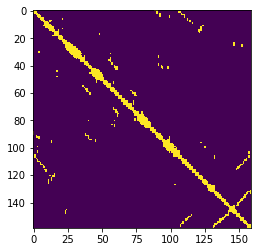

In [5]:
flines = open('contactgraph_bb.csv').readlines()
cgraph = np.zeros([159,159])
for i,line in enumerate(flines):
    cgraph[i,:] = np.array([int(n) for n in line.split(',')])
plt.imshow(cgraph)

#### Identify sector-connected surface sites

In [6]:
secConnSurf = []
for i,sec in enumerate(secdef):
    secConnSurf.append([str(pos) for pos in surfRes if sum([cgraph[pos-1][k-1] for k in sec]) > 1])
    print ("Sector connected surface sites at cutoff %1.3f: " % (p_cutoffs[i]))
    #print ('+'.join(secConnSurf[-1]))
    print(len(secConnSurf[-1]))

Sector connected surface sites at cutoff 0.005: 
21
Sector connected surface sites at cutoff 0.008: 
35
Sector connected surface sites at cutoff 0.010: 
36
Sector connected surface sites at cutoff 0.015: 
43


In [7]:
def createList(r1, r2): 
    return list(range(r1, r2+1)) 
      
# Driver Code 
r1, r2 = 1, 159
protein_sites=createList(r1, r2)
print(protein_sites)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


In [8]:
#identify sector-connected sites in protein
secConnSurf = []
for i,sec in enumerate(secdef):
    secConnSurf.append([str(pos) for pos in protein_sites if sum([cgraph[pos-1][k-1] for k in sec]) > 1])
    sec_conn_surf_int = list(map(int, secConnSurf[-1]))
    sector_connected_ns = [x for x in sec_conn_surf_int if x not in sec]
    print ("Sector connected non sector sites at cutoff %1.3f: " % (p_cutoffs[i]))
    #print (sector_connected_ns)
    print(len(sector_connected_ns))

Sector connected non sector sites at cutoff 0.005: 
27
Sector connected non sector sites at cutoff 0.008: 
43
Sector connected non sector sites at cutoff 0.010: 
44
Sector connected non sector sites at cutoff 0.015: 
51


In [9]:
print(len(surfRes))

84


In [10]:
sec_conn_surf_int = list(map(int, secConnSurf[-1]))
sector_connected_ns = [x for x in sec_conn_surf_int if x not in sec]
print(sector_connected_ns)

[2, 4, 6, 7, 8, 9, 12, 14, 16, 17, 19, 20, 23, 24, 26, 29, 30, 33, 34, 36, 38, 41, 43, 46, 48, 58, 60, 61, 62, 65, 76, 78, 79, 80, 91, 92, 93, 96, 97, 98, 101, 102, 103, 104, 108, 109, 112, 123, 124, 127, 152]


In [11]:
print(sector_connected_ns)

[2, 4, 6, 7, 8, 9, 12, 14, 16, 17, 19, 20, 23, 24, 26, 29, 30, 33, 34, 36, 38, 41, 43, 46, 48, 58, 60, 61, 62, 65, 76, 78, 79, 80, 91, 92, 93, 96, 97, 98, 101, 102, 103, 104, 108, 109, 112, 123, 124, 127, 152]
